In [ ]:
%matplotlib inline
import numpy as np
import IPython.display as ipd
import librosa, librosa.display
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)

In [3]:
x, sr = librosa.load('data/raw/dream_on.wav')
x = x[:int(len(x)/10)]
ipd.Audio(x, rate=sr)

<audio controls="controls" >
                    <source src="data:audio/wav;base64,UklGRh4zEgBXQVZFZm10IBAAAAABAAEAIlYAAESsAAACABAAZGF0YfoyEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAQAAAAEAAQAAAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAAAAQABAAEAAQABAAEAAQABAAEAAQAAAAAAAQABAAEAAQABAAEAAQAAAAAAAQAAAAEAAAAAAAEAAQABAAEAAQAAAAEAAQABAAAAAAAAAAEAAQABAAEAAQABAAEAAAABAAAAAQABAAAAAAABAAEAAQABAAAAAQABAAEAAQABAAEAAQAAAAEAAQAAAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAEAAQABAAEAAQABAAAAAQABAAEAAQABAAAAAAABAAEAAAAAAAAAAAAAAAEAAQABAAEAAQABAAAAAQABAAEAAQABAAAAAAABAAEAAAAAAAEAAQABAAEAAQABAAEAAAABAAEAAQAAAAAAAQABAAEAAQABAAAAAQAAAAEAAQAAAAEAAAABAAAAAQAAAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAAAAQAAAAEAAQAAAAEAAQAAAAAAAAABAAEAAQABAAAAAQABAAEAAQAAAAEAAAAAAAEAAQABAAAAAQABAAEAAAABAAEAAQABAAAAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQAAAAEAAAABAAAAAQAAAAEAAQABAAEAAQABAAEAAAABAAAAAQABAAAAAAABAAAAAAAAAAAAAQABAAEAAQABAAEAAQABAAEAAAABAAAAAAAAAAEAAQABAAEAAQABAAAAAQABAAEAAAAAAAEAAQABAAAAAQABAAEAAQABAAAAAQABAAEAAAABAAEAAAABAAEAAAABAAEAAQABAAEAAAABAAEAAAABAAEAAQABAAAAAQABAAEAAQABAAEAAQAAAAEAAQABAAEAAAABAAEAAQABAAEAAQABAAEAAQAAAAAAAAAAAAEAAAABAAEAAQABAAEAAQABAAEAAQABAAAAAQAAAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAAAAQABAAEAAQAAAAEAAAABAAEAAQAAAAEAAAABAAEAAQABAAEAAQABAAEAAAABAAAAAAABAAEAAQABAAEAAQAAAAAAAQAAAAEAAAAAAAEAAAABAAEAAQABAAEAAAABAAEAAQABAAEAAAAAAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAAAAQABAAEAAQABAAAAAAABAAEAAQABAAEAAAABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQAAAAEAAAABAAAAAQABAAAAAQABAAEAAAABAAAAAAABAAEAAQABAAEAAQAAAAEAAQABAAEAAQABAAAAAAAAAAAAAQABAAEAAQAAAAEAAAAAAAEAAAABAAEAAAAAAAEAAQABAAEAAQABAAAAAQABAAEAAQABAAAAAQABAAEAAQABAAEAAQABAAAAAQABAAEAAQAAAAEAAQABAAEAAQABAAEAAQABAAEAAAABAAEAAQABAAEAAQABAAEAAQABAAEAAAABAAEAAQABAAAAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQAAAAEAAQABAAEAAAABAAEAAQABAAEAAQABAAEAAAAAAAEAAQABAAEAAQABAAEAAAABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAAAAQABAAEAAQABAAEAAAAAAAEAAQAAAAEAAQABAAEAAAABAAEAAQAAAAEAAQABAAEAAAAAAAEAAQAAAAEAAQABAAEAAAABAAEAAAABAAAAAQABAAEAAQAAAAEAAQABAAEAAQAAAAEAAQAAAAEAAQABAAEAAQAAAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAEAAQABAAAAAQABAAEAAQAAAAEAAQABAAAAAQABAAEAAAABAAAAAQAAAAEAAAABAAAAAAABAAEAAQAAAAEAAAABAAEAAQABAAEAAQABAAEAAAABAAAAAQABAAEAAQAAAAEAAQAAAAEAAAAAAAAAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAAAAQABAAEAAQAAAAEAAQABAAAAAQAAAAEAAQABAAAAAQABAAAAAQABAAEAAQABAAEAAQABAAAAAAABAAAAAQABAAEAAQABAAAAAQABAAAAAQABAAAAAAABAAEAAQABAAAAAAABAAEAAQAAAAAAAQABAAEAAAAAAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAAABAAAAAQABAAAAAQABAAEAAAAAAAAAAQAAAAAAAAAAAAEAAAABAAEAAQABAAEAAQAAAAAAAQABAAEAAQABAAEAAAABAAEAAQAAAAAAAQABAAEAAQABAAAAAAABAAAAAQAAAAAAAQAAAAAAAAAAAAEAAQABAAEAAAAAAAAAAQABAAEAAQAAAAEAAQABAAEAAQABAAEAAQABAAEAAQAAAAAAAQAAAAAAAAABAAEAAQABAAEAAQABAAAAAQAAAAEAAQABAAAAAQABAAAAAQABAAEAAAABAAEAAAABAAEAAQABAAAAAQAAAAEAAQABAAAAAAABAAEAAQABAAEAAQABAAEAAAABAAEAAQABAAEAAAAAAAEAAQABAAEAAQAAAAAAAQABAAAAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAAAAAABAAAAAQABAAEAAQAAAAEAAQABAAEAAQABAAEAAQAAAAAAAAABAAEAAQABAAEAAAABAAAAAQABAAEAAQABAAEAAAAAAAEAAQABAAEAAAABAAEAAQAAAAEAAQABAAEAAQAAAAEAAQAAAAEAAQABAAAAAQABAAAAAQABAAEAAAABAAEAAQABAAAAAAABAAEAAQABAAEAAAABAAEAAQABAAAAAQAAAAEAAQABAAEAAAAAAAEAAQAAAAEAAQABAAEAAAABAAEAAQABAAAAAQABAAEAAQAAAAEAAAAAAAEAAQAAAAEAAQABAAEAAAAB

# Melody MCQT
### (Section 3.C.4)

(288, 2330)


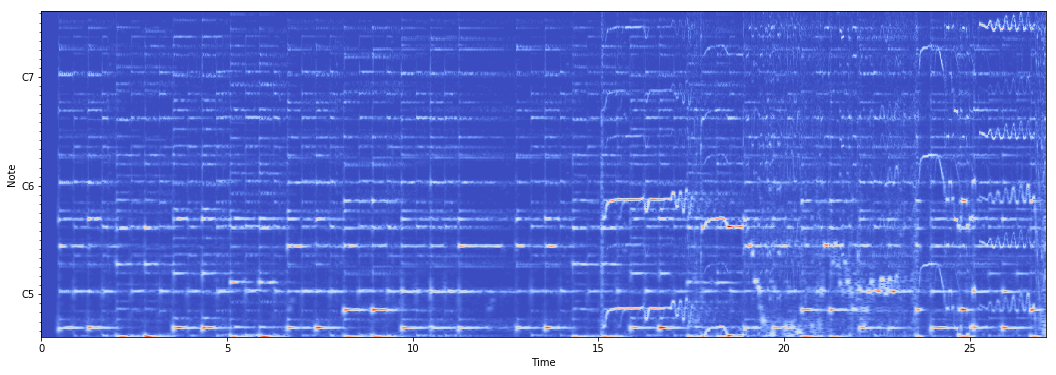

In [4]:
import src.features as features

q, f = features.extract_melody_cqt(x, sr, plot=True)
print(q.shape)

(108, 292)


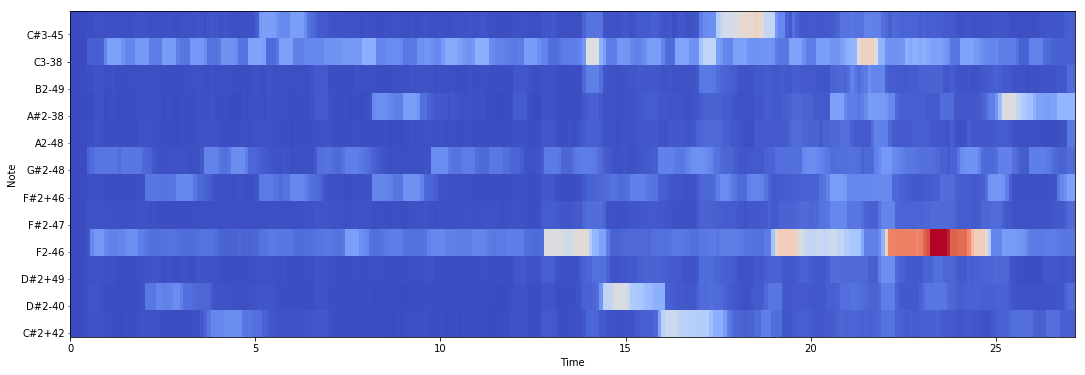

In [6]:
q, f = features.extract_harmony_chroma(x, sr, plot=True)
print(q.shape)

(10, 3389)


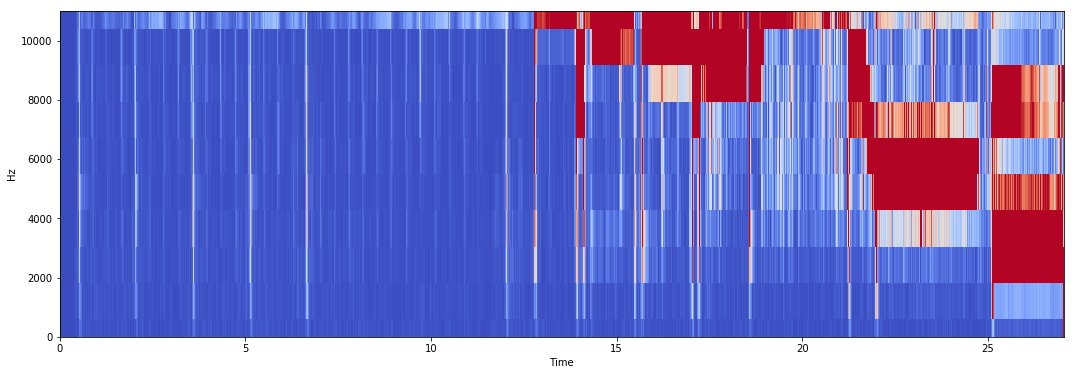

In [7]:
q, f = features.extract_bass_lfs(x, sr, plot=True)
print(q.shape)

(257, 2330)


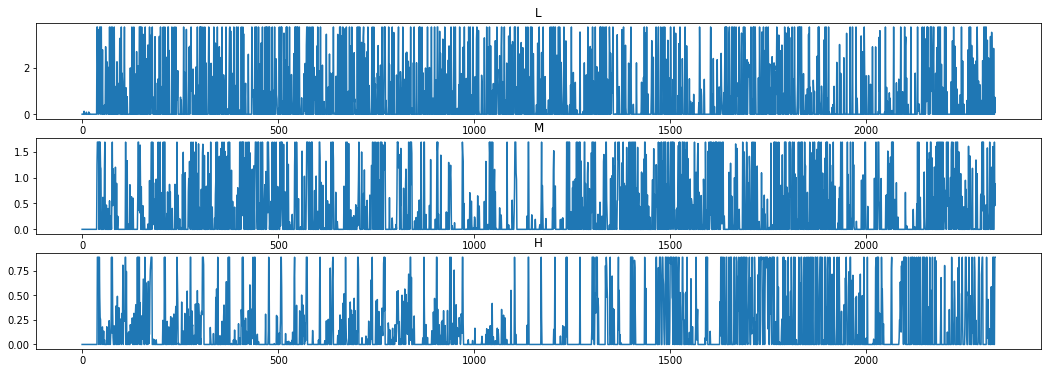

In [8]:
q, f = features.extract_rhythm_odf(x, sr, plot=True)
print(q.shape)